In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shoppingData = pd.read_csv('Social_Network_Ads.csv')

In [3]:
#Check for missing data
shoppingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
features = shoppingData.iloc[:,[2,3]].values
label = shoppingData.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=150)

In [6]:
#Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Check Generalization of the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8125
0.875


In [8]:
#Since this unbalanced dataset, we will use PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [9]:
#Get The probabilities score
probs = model.predict_proba(features)

In [11]:
#Keep the positive outcomes ---- Keep True Probabilities
probs = probs[:,1]

In [12]:
#Perform prediction of features
y_pred = model.predict(features)

In [13]:
#Cal PR score
precision, recall, thre = precision_recall_curve(label,probs)

In [14]:
#Cal F1 score
f1 = f1_score(label,y_pred)

In [15]:
#Calc AUC
auc = auc(recall,precision)

0.8473521270890665


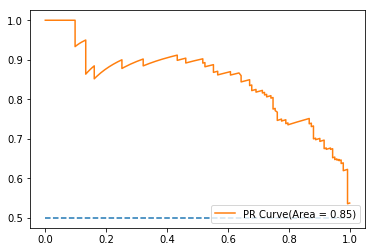

In [21]:
#Plot PR with Skill line
plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, label='PR Curve(Area = %0.2f)' %auc)
plt.legend(loc = "lower right")

print(auc)

In [ ]:
#Skill line for PR curve 
#(0,0.5)(1,0.5)

In [28]:
#KNN Model PR Curve
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=4)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

#Get The probabilities score
probs = model.predict_proba(features)

#Keep the positive outcomes ---- Keep True Probabilities
probs = probs[:,1]

#Cal PR score
precision, recall, thre = precision_recall_curve(label,probs)



In [38]:
print(precision)
print(recall)
#auc = auc(recall,precision)
from sklearn.metrics import auc
auc = auc(recall,precision)
print(auc)

[0.38648649 0.44585987 0.52380952 0.60280374 0.62944162 0.67251462
 0.68152866 0.73611111 0.82608696 0.86813187 0.85882353 0.85
 0.93548387 0.93220339 0.94339623 0.94       0.93617021 1.
 1.        ]
[1.         0.97902098 0.92307692 0.9020979  0.86713287 0.8041958
 0.74825175 0.74125874 0.66433566 0.55244755 0.51048951 0.47552448
 0.40559441 0.38461538 0.34965035 0.32867133 0.30769231 0.13286713
 0.        ]
0.8303476792286273


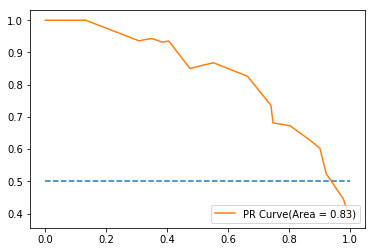

In [39]:
#Calc AUC
#auc = auc(recall,precision)

#Plot PR with Skill line
plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, label='PR Curve(Area = %0.2f)' %auc)
plt.legend(loc = "lower right")


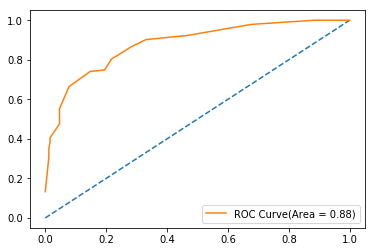

In [42]:
#Use it only if your dataset is balanced and follows Binary Classification
#ROC Code for Binary Classification
#Not considered for this usecASe
# This is just a study code

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Get The probabilities score
probs = model.predict_proba(features)

#Keep the positive outcomes ---- Keep True Probabilities
probs = probs[:,1]

#Cal PR score
fpr, tpr, thre = roc_curve(label,probs)

#Calc AUC
auc = auc(fpr,tpr)

#Plot ROC with Skill line
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr, label='ROC Curve(Area = %0.2f)' %auc)
plt.legend(loc = "lower right")


